In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
from matplotlib.patches import Ellipse

Using TensorFlow backend.


In [2]:
ctx = straxbra.XebraContext()

In [3]:
run = '00158'
peaks_data = ctx.get_array(run, 'peaks')

In [4]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [5]:

def decay_cut(timestamp, integral, width, i):
    
    time_diff = timestamp[i+1] - timestamp[i]
    if integral[i] > 100 \
    and integral[i] < 400 \
    and width[i] < 70 \
    and width[i] > 10 \
    and time_diff   < 1000 \
    and integral[i+1]   < 200 \
    and integral[i+1]   > 40 \
    and width[i+1] < 80\
    and width[i+1] > 20\
    :    
        return True
    else:
        return False
    
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [6]:
def Process(waveform, i):
    if decay_cut(timestamp,integral, width, i):
        
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):

                k=1 
                s2_counter_timestamp = timestamp[i+j+k]
                while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:

                    if threshold_timestamp <= s2_counter_timestamp:
                        
                        s1_32keV_area.append(integral[i])
                        s1_9keV_area.append(integral[i+1])
                        s1_32keV_width.append(width[i])
                        s1_9keV_width.append(width[i+1])
                        
                        
                        s2_32keV_area.append(integral[i+j])
                        s2_9keV_area.append(integral[i+j+1])
                        s2_32keV_width.append(width[i+j])
                        s2_9keV_width.append(width[i+j+1])
        
        
        return
    else:
        return

In [7]:
s2_32keV_area = []
s2_9keV_area = []
s2_32keV_width = []
s2_9keV_width = []

s1_32keV_area = []
s1_9keV_area = []
s1_32keV_width = []
s1_9keV_width = []
num = len(waveform)-1
print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


4527


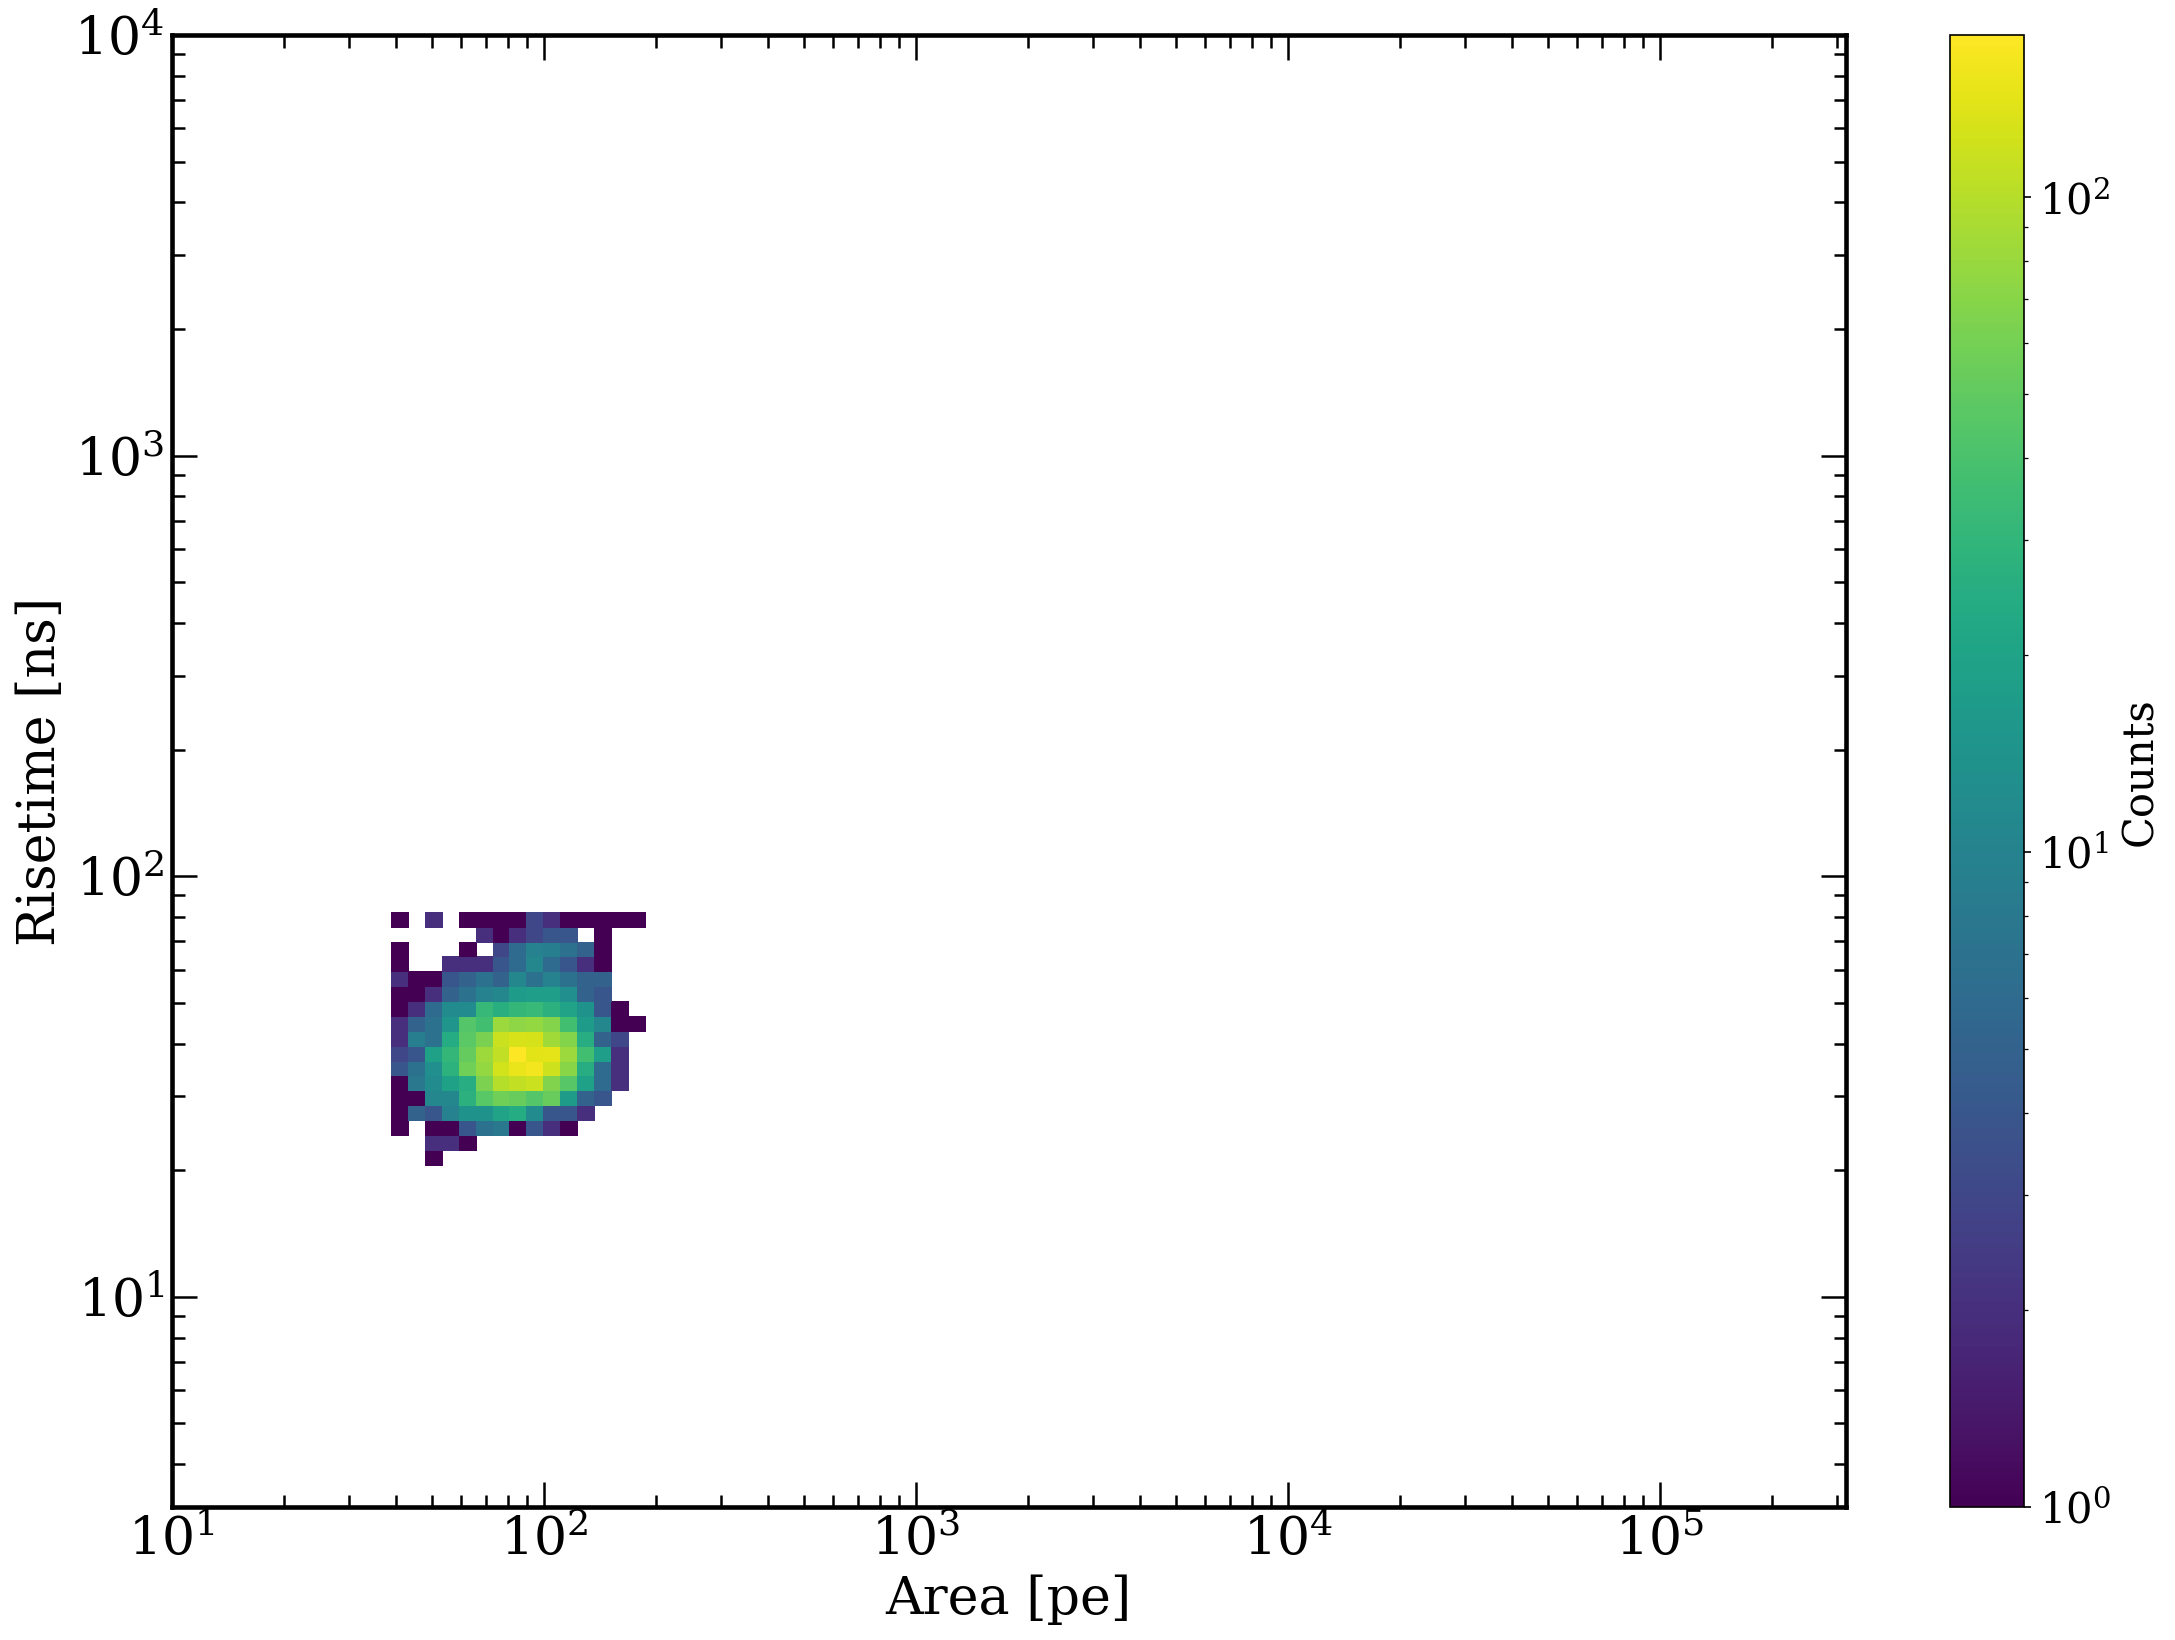

3635504


In [8]:
fig, axes = ps.styles()
print(len(s1_9keV_area))
bins_x = np.logspace(1,5.5,100)
bins_y = np.logspace(0.5,4,100)
histo_max= 2*10**3


counts, _, _ = np.histogram2d(s1_9keV_area, s1_9keV_width, bins=(bins_x, bins_y))
#counts2, _, _ = np.histogram2d(s1_9keV_area, s1_9keV_width, bins=(bins_x, bins_y))
im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm())
#im2 = axes.pcolormesh(bins_x, bins_y, counts2.T, norm=LogNorm())
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Area [pe]')
axes.set_ylabel('Risetime [ns]')


plt.show()
print(len(waveform))

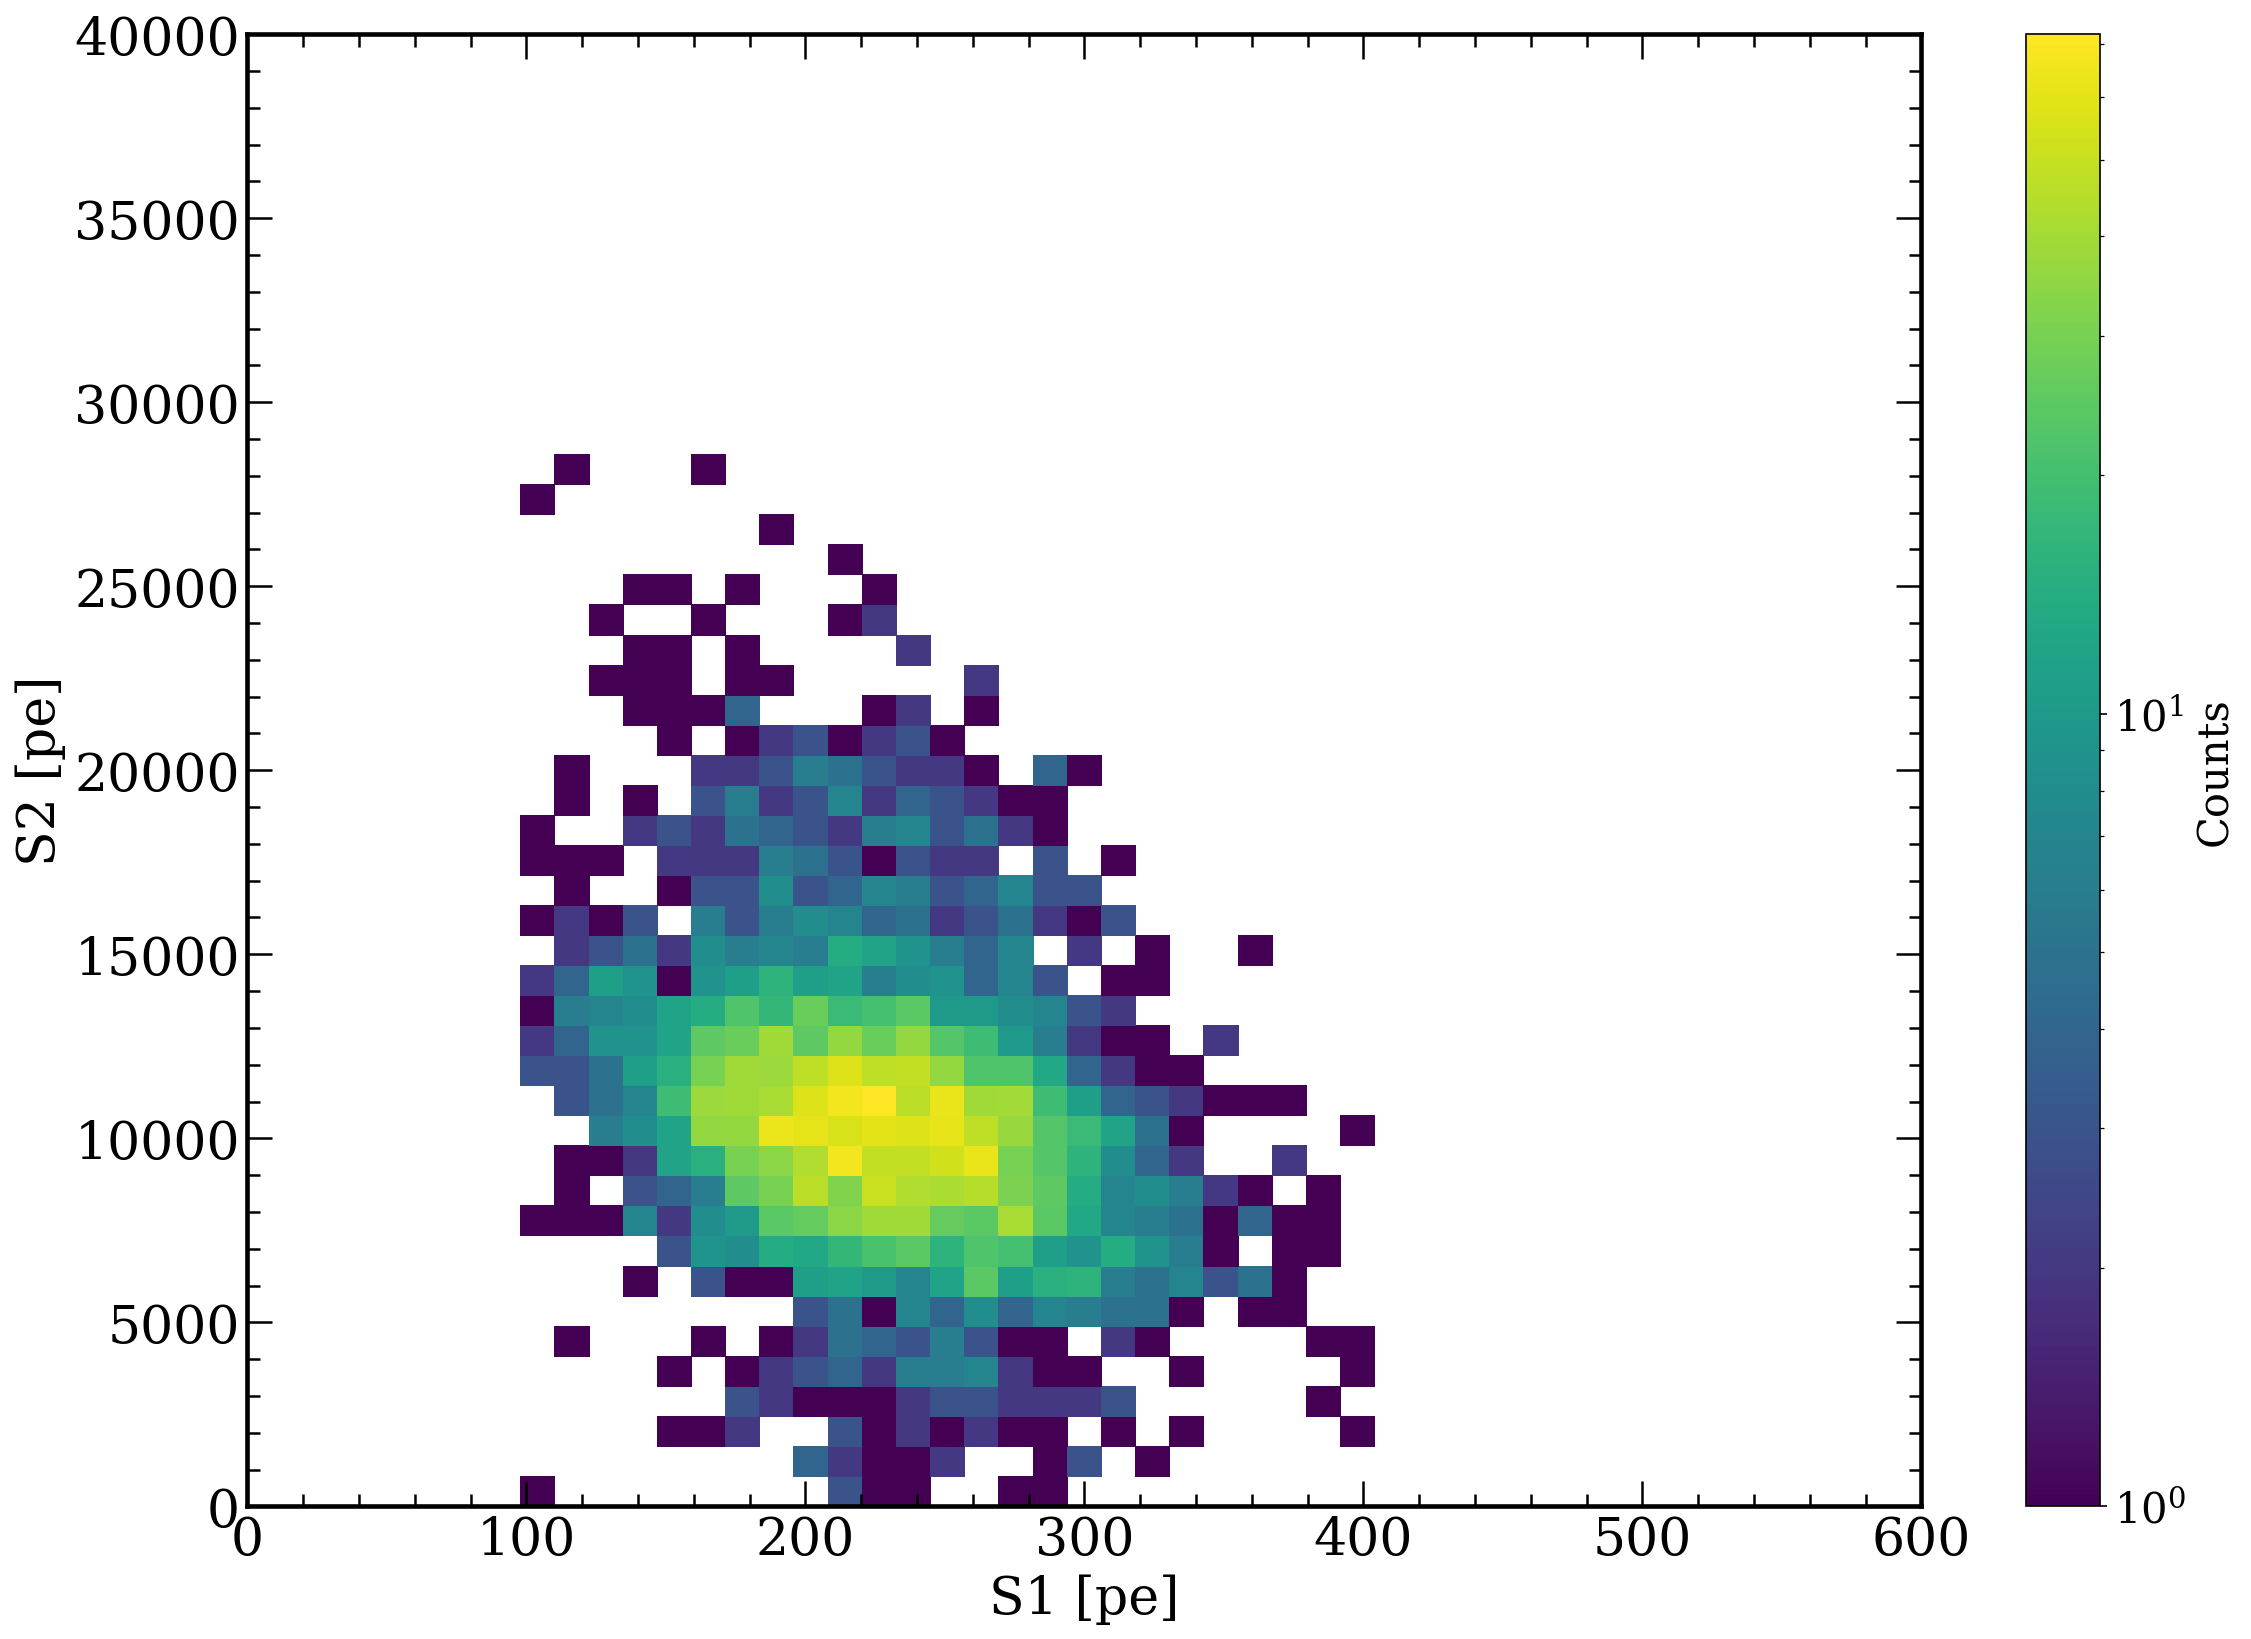

In [9]:
fig, axes = ps.styles()




bins_x = np.linspace(0,600,50)
bins_y = np.linspace(0,40000,50)

# bins_x = np.logspace(2,2.6,100)
# bins_y = np.logspace(2,5,100)
histo_max= 2*10**3



counts, _, _ = np.histogram2d(s1_32keV_area, s2_32keV_area, bins=(bins_x, bins_y))




im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=mpl.colors.LogNorm(), cmap = 'viridis')
#axes.scatter(x_value, y_value, c = 'c', s=10)
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20) 
# axes.set_xscale('log')
# axes.set_yscale('log')
# axes.set_xlim([0,500])
# axes.set_ylim([0,50000])
axes.set_xlabel('S1 [pe]')
axes.set_ylabel('S2 [pe]')


plt.show()
